LIBRARY AND UTILITIES

In [1]:
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

Data understanding

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.columns
df.nunique()
df.describe()
df.isnull().sum()
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Exploratory Data Analysis

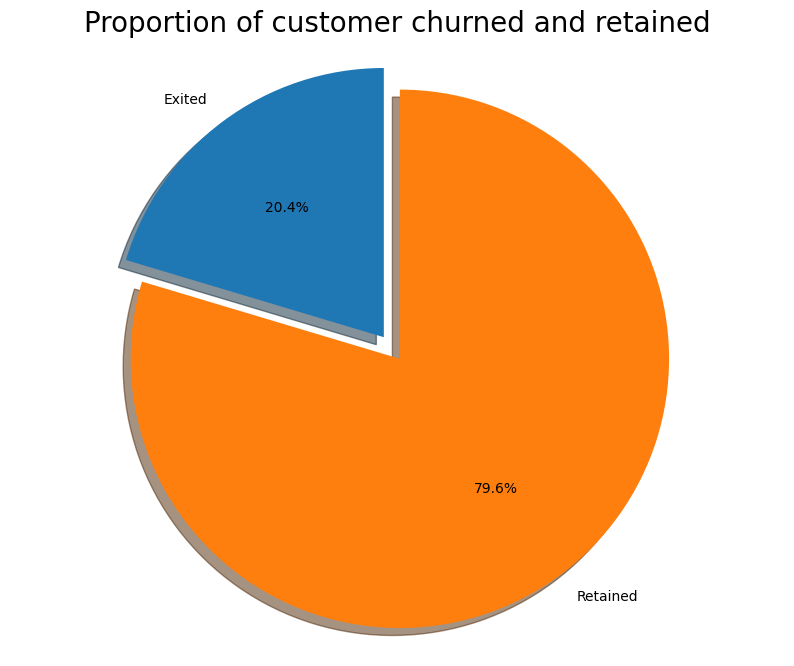

In [3]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

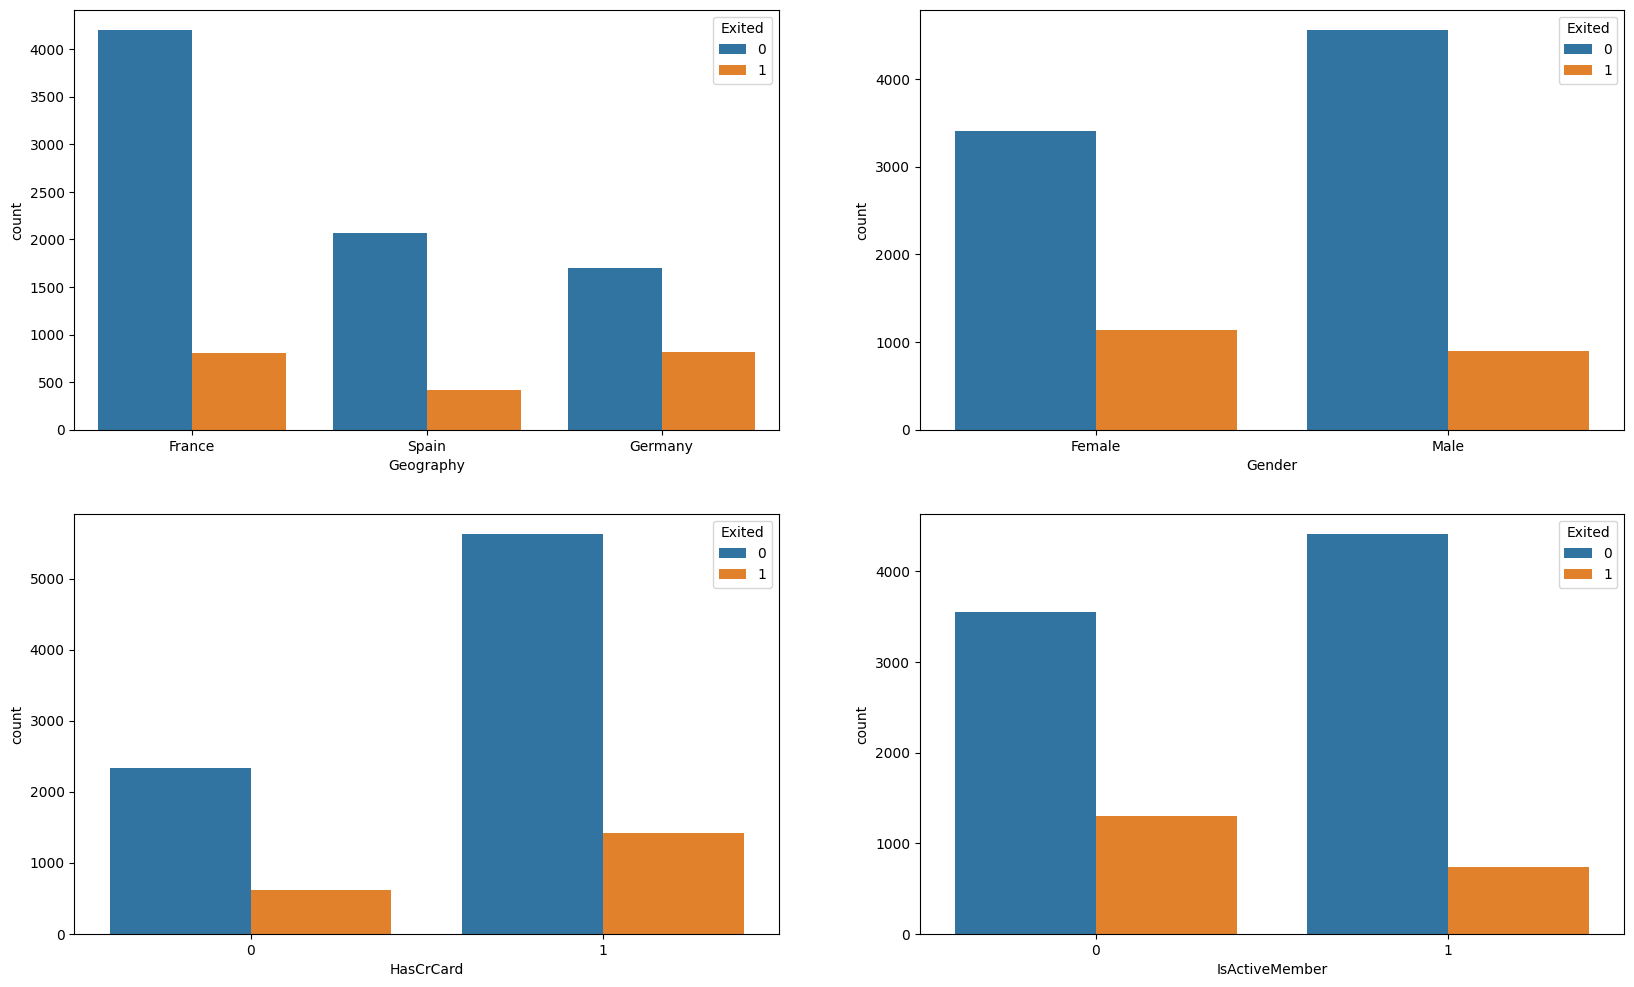

In [4]:
# We first review the 'Status' relation with categorical variables
fig , axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [5]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

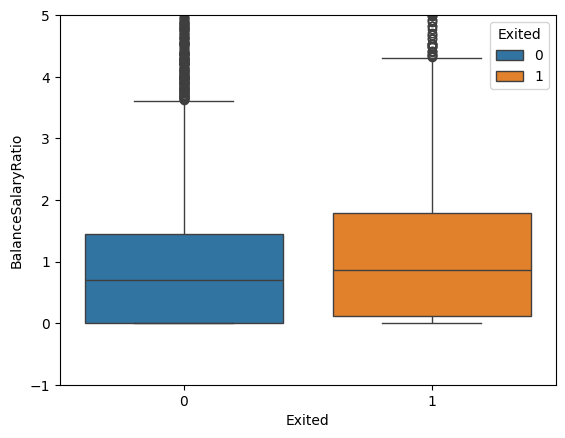

In [6]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

(-1.0, 5.0)

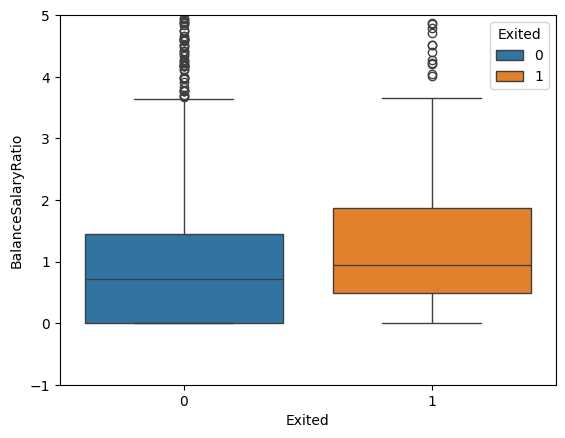

In [7]:
df_test['BalanceSalaryRatio'] = df_test.Balance/df_test.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_test)
plt.ylim(-1, 5)

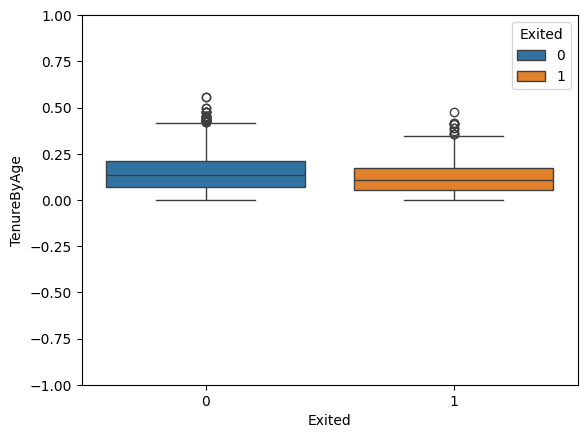

In [8]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

(-1.0, 1.0)

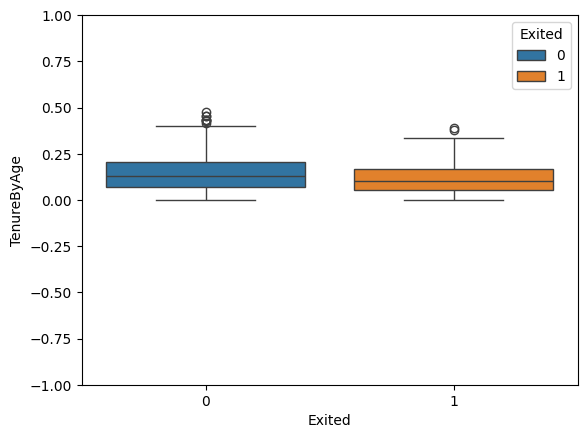

In [9]:
df_test['TenureByAge'] = df_test.Tenure/(df_test.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_test)
plt.ylim(-1, 1)

In [10]:
plt.show()

In [11]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
df_test['CreditScoreGivenAge'] = df_test.CreditScore/(df_test.Age)
df_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.759604,0.181818,14.659091
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,0.000000,0.375000,22.875000
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,0.000000,0.133333,13.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9952,15763874,Ho,635,Spain,Male,46,8,0.00,2,1,1,60739.16,0,0.000000,0.173913,13.804348
9967,9968,15603794,Pugliesi,623,France,Male,48,5,118469.38,1,1,1,158590.25,0,0.747016,0.104167,12.979167
9969,9970,15806360,Hou,609,France,Male,41,6,0.00,1,0,1,112585.19,0,0.000000,0.146341,14.853659
9973,9974,15806455,Miller,611,France,Male,27,7,0.00,2,1,1,157474.10,0,0.000000,0.259259,22.629630


Data Preprocessing

In [12]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[continuous_vars+ cat_vars + ['Exited']]
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female,0
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female,0
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female,0
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male,0
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male,0


In [13]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_test = df_test[continuous_vars+ cat_vars + ['Exited']]
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female,1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female,0
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,0,Spain,Male,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,Spain,Female,0
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,0,0,Spain,Male,0


In [14]:
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female,0
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female,0
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female,0
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male,0
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male,0


In [15]:
df_test.loc[df_test.HasCrCard == 0, 'HasCrCard'] = -1
df_test.loc[df_test.IsActiveMember == 0, 'IsActiveMember'] = -1
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Exited
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female,1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female,0
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,Spain,Male,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,Spain,Female,0
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,Spain,Male,0


In [16]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
  if (df_train[i].dtype == str or df_train[i].dtype == object):
    for j in df_train[i].unique():
      df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
    remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,0,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,0,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,0,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,0,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,0,-1,1,-1,-1,1


In [17]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
  if (df_test[i].dtype == str or df_test[i].dtype == object):
    for j in df_test[i].unique():
      df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)
    remove.append(i)
df_test = df_test.drop(remove, axis=1)
df_test.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7176\981015218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7176\981015218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,1,-1,-1,1,-1
3,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,1,-1,-1,1,-1
5,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,1,-1,1,-1,-1,1
17,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,0,-1,1,-1,1,-1
18,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,0,-1,1,-1,-1,1


In [18]:
swap_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Exited', 'Geography_Spain', 'Geography_France', 'Geography_Germany', 'Gender_Female', 'Gender_Male']
df_test = df_test.reindex(columns=swap_list)
df_test.head()
df_test['Exited'].value_counts()

Exited
0    1610
1     390
Name: count, dtype: int64

In [19]:
##without scaling our values look like
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,0,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,0,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,0,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,0,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,0,-1,1,-1,-1,1


In [20]:

# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,0,1,-1,-1,1,-1
6332,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,0,-1,1,-1,1,-1
8895,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,0,-1,1,-1,1,-1
5351,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,0,-1,-1,1,-1,1
4314,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,0,-1,1,-1,-1,1


In [21]:
# minMax scaling the continuous variables
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
2,0.270440,0.324324,0.8,0.750363,0.666667,0.570039,0.000132,0.400000,0.135061,1,-1,1,-1,1,-1,1,-1
3,0.683438,0.283784,0.1,0.000000,0.333333,0.469437,0.000000,0.053846,0.292387,-1,-1,0,-1,1,-1,1,-1
5,0.570231,0.351351,0.8,0.534621,0.333333,0.749303,0.000072,0.381818,0.206382,1,-1,1,1,-1,-1,-1,1
17,0.368973,0.081081,0.9,0.000000,0.333333,0.072030,0.000000,0.787500,0.422869,1,1,0,1,-1,-1,1,-1
18,0.448637,0.364865,0.6,0.000000,0.000000,0.793978,0.000000,0.280000,0.163837,-1,-1,0,1,-1,-1,-1,1


Cross Validation

In [22]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [23]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
# Function to give best model score and parameters
def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
  auc_score = roc_auc_score(y_actual, method);
  fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
  return (auc_score, fpr_df, tpr_df)

In [26]:
# Fit primal logistic regression without scaling data
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [500], 'fit_intercept':[True],
'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=1)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.815625
{'C': 50, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=500)


In [27]:
# Fit primal logistic regression with scaling data
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [500], 'fit_intercept':[True],
'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=1)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.815625
{'C': 50, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=500)


In [28]:
# Fit SVM with RBF Kernel without scaling data
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [29]:
# Fit SVM with RBF Kernel with scaling data
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [30]:
# Fit random forest classifier without scaling data
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=1)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8651249999999999
{'max_depth': 8, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=3)


In [31]:
# Fit random forest classifier with scaling data
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=1)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8634999999999999
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5,
                       n_estimators=50)


In [32]:
# Fit Extreme Gradient boosting classifier with scaling data
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=1)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
0.8626250000000001
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model Traing

In [ ]:
# Fit primal logistic regression with scaling the data
log_primal = LogisticRegression(C=100, max_iter=250, tol=1e-05)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [ ]:
# Fit SVM with RBF Kernel with scaling the data
SVM_RBF = SVC(C=100, gamma=0.1, probability=True)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit Random Forest classifier with scaling
RF = RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=7)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=7)

In [ ]:
# Fit Extreme Gradient Boost Classifier with scaling
XGB = XGBClassifier(gamma=0.001, learning_rate=0.2, max_depth=7, n_estimators=5)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [ ]:
#accuracy score for logistic regression with scaling
y_pred_log = log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of logistic regression with scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of logistic regression with scaling:  0.822


In [ ]:
#accuracy score for support vector machine with scaling
y_pred_svm = SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of support vector machine with scaling: ",accuracy_score(df_test.Exited,y_pred_log))

Accuracy score of support vector machine with scaling:  0.822


In [ ]:
#accuracy score for random forest with scaling
y_pred_rf = RF.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Random Forest with scaling: ",accuracy_score(df_test.Exited,y_pred_rf))

Accuracy score of Random Forest with scaling:  0.865


In [ ]:
#accuracy score for xgboost with scaling
y_pred_xgb = XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])
print("Accuracy score of Extreme graident boosting wih scaling: ",accuracy_score(df_test.Exited,y_pred_xgb))

Accuracy score of Extreme graident boosting wih scaling:  0.8545


Performance Metrics

[[1514   96]
 [ 260  130]]


<Axes: >

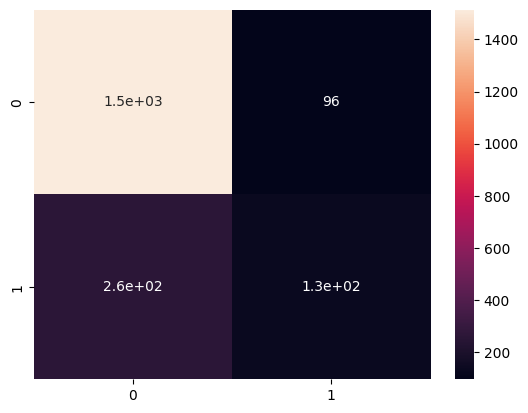

In [ ]:
#confusion matrix for logistic regression with scaling
cf_matrix_log = confusion_matrix(df_test.Exited, y_pred_log)
print(cf_matrix_log)
import seaborn as sns
sns.heatmap(cf_matrix_log, annot=True)

[[1567   43]
 [ 239  151]]


<Axes: >

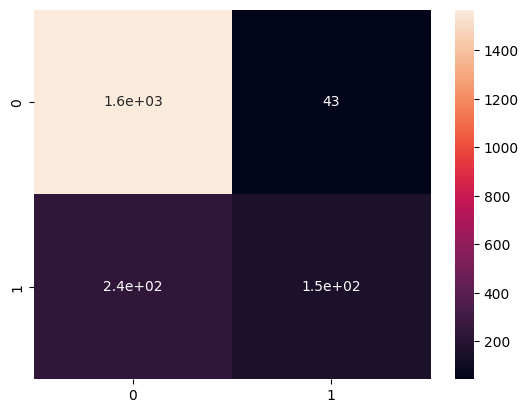

In [ ]:
#confusion matrix for svm with scaling
cf_matrix_svm = confusion_matrix(df_test.Exited, y_pred_svm)
print(cf_matrix_svm)
import seaborn as sns
sns.heatmap(cf_matrix_svm, annot=True)

[[1551   59]
 [ 211  179]]


<Axes: >

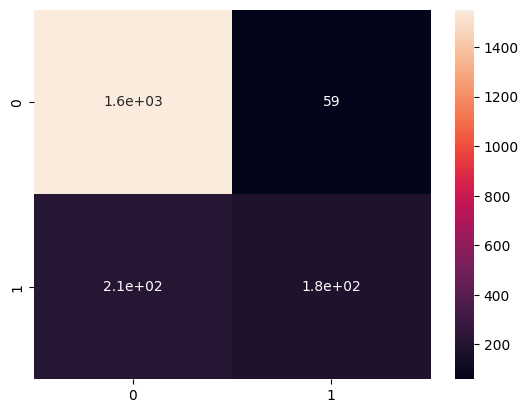

In [ ]:
#confusion matrix for random forest with scaling
cf_matrix_rf = confusion_matrix(df_test.Exited, y_pred_rf)
print(cf_matrix_rf)
import seaborn as sns
sns.heatmap(cf_matrix_rf, annot=True)

[[1571   39]
 [ 252  138]]


<Axes: >

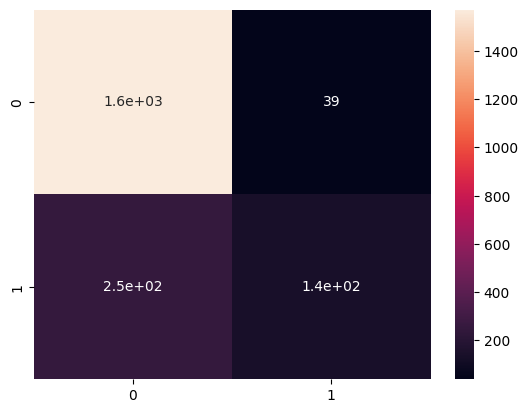

In [ ]:
#confusion matrix for xgboost with scaling
cf_matrix_xgb = confusion_matrix(df_test.Exited, y_pred_xgb)
print(cf_matrix_xgb)
import seaborn as sns
sns.heatmap(cf_matrix_xgb, annot=True)

In [ ]:
#logistic regression with scaling
print(classification_report(df_test.Exited, log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1610
           1       0.58      0.33      0.42       390

    accuracy                           0.82      2000
   macro avg       0.71      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



In [ ]:
#support vector machine with scaling
print(classification_report(df_test.Exited, SVM_RBF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1610
           1       0.78      0.39      0.52       390

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
#random forest with scaling
print(classification_report(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.75      0.46      0.57       390

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [ ]:
#xgboost with scaling
print(classification_report(df_test.Exited, XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1610
           1       0.78      0.35      0.49       390

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000



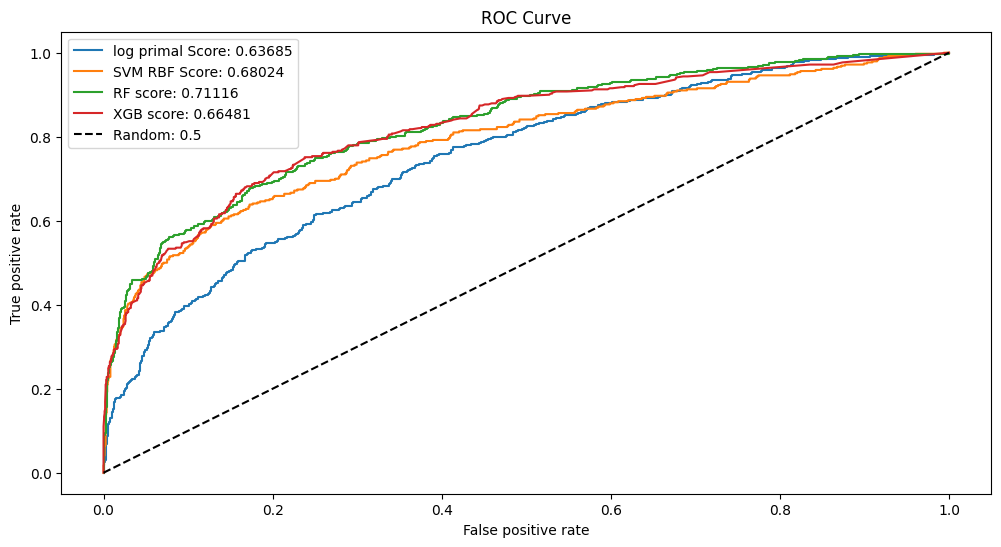

In [ ]:
#ROC curve for without scaling data
y = df_test.Exited
X = df_test.loc[:, df_test.columns != 'Exited']
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

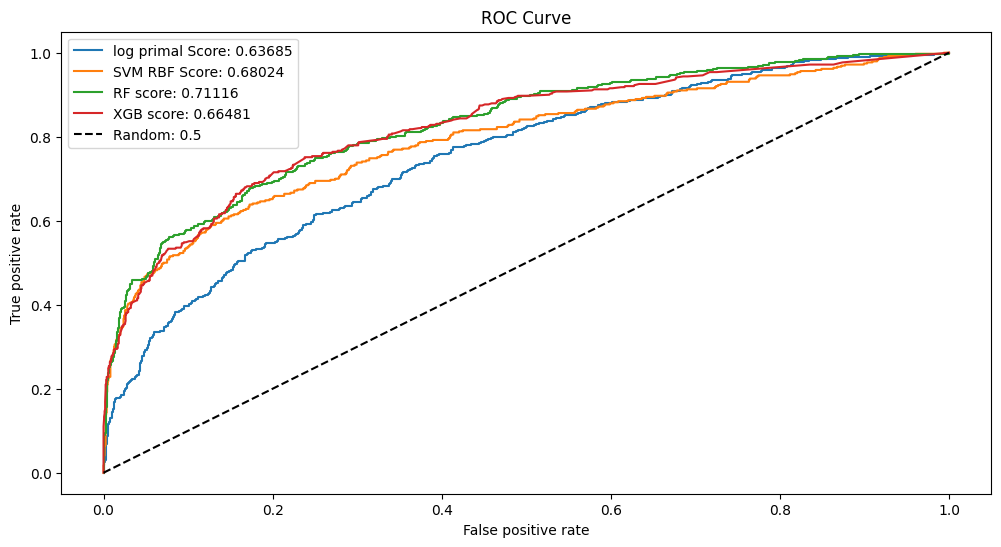

In [ ]:
#ROC curve for with scaling data
y = df_test.Exited
X = df_test.loc[:, df_test.columns != 'Exited']
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [52]:
import joblib

# Assuming your trained model is stored in a variable named `rf_model`
joblib.dump(RF, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
joblib.dump(rf_model, 'random_forest_churn_model.pkl')